In [13]:
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display, Math
%config InlineBackend.figure_format ='retina' # Pour avoir de jolis plots sur ecran retina
#%matplotlib notebook
from scipy.integrate import odeint

In [16]:
### Data ###

eta    = 0.5
dp     = 0.008                      # Particule diameter
T      = 653.15 
k      = 5.880744572                # Rate constant
K      = 14.46405216                # Equilibrium constant
epsi   = 0.4876552                  # Void fraction
rho_b  = 2550*(1-epsi)
K_CO   = 0.6
K_CO2  = 4.1
K_H2   = 4.1
K_H2O  = 1.3
L      = 0.3  
us     = 0.091419                  # Superficial velocity in m/s
xsi    = np.linspace(0, 1, 10000)   # Adimensionnal dimension
Beta   = L*rho_b/us
Pe_dp  = [0.2, 0.5, 1, 2]

# QUESTION 1

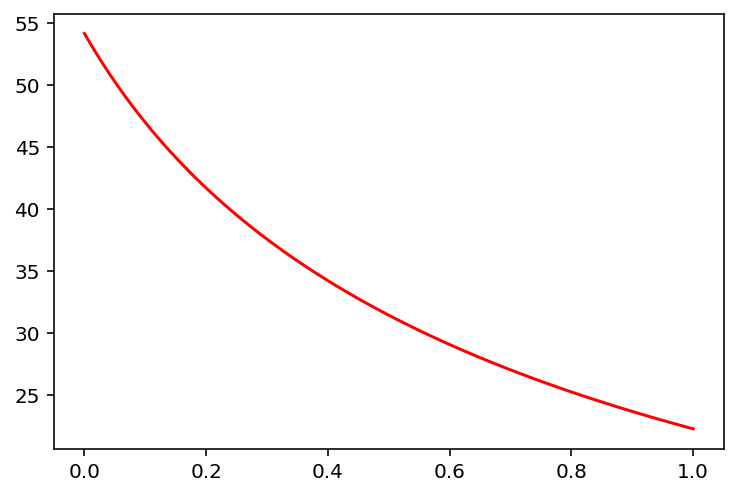

22.254757495160938


In [11]:
### Question 1 ### 

eta    = 0.5                      # Effectiveness factor 
Xend   = 1
Xstart = 0
Ustart = 54.16242886   # Condition initiale CO [mol/m^3] 


def Reactor_without_dispersion(X):
    h = (Xend-Xstart)/len(X)
    U = np.zeros(len(X))
    U[0] = Ustart
    i = 1
    for i in range(len(X)-1):
        U[i+1] =  U[i] + h*(-Beta/2)*((k*K_CO*K_H2O)*U[i]*(U[i]+38.6875)-((72.73-U[i])*(182.6047-U[i]))/K)/(1 + K_CO*U[i] + K_H2O*(U[i] +38.6875) + K_CO2*(72.73-U[i]) + K_H2*(182.6047-U[i]))**2
    plt.plot(X,U,'r')
    plt.show()
    return U

C_A = Reactor_without_dispersion(xsi)
print(C_A[len(xsi)-1])
### PLOT POUR LE PROFIL DE CONCENTRATION DE CO ###

## Concentration profile plot for H2O

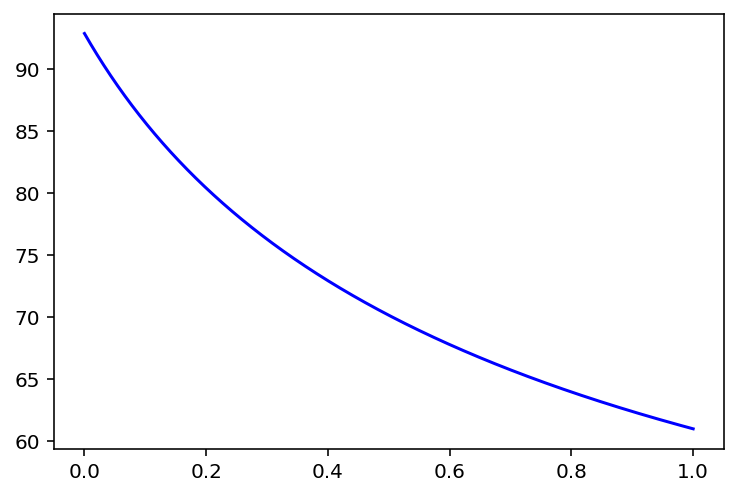

In [5]:
### PLOT POUR LE PROFIL DE CONCENTRATION DE H2O ###

H2O = np.linspace(0, 1, 10000)
j = 1
for j in range(len(xsi)):
    H2O[j] = C_A[j] + 38.6875
plt.plot(xsi,H2O,'b')
plt.show()


## Concentration profile plot for CO2

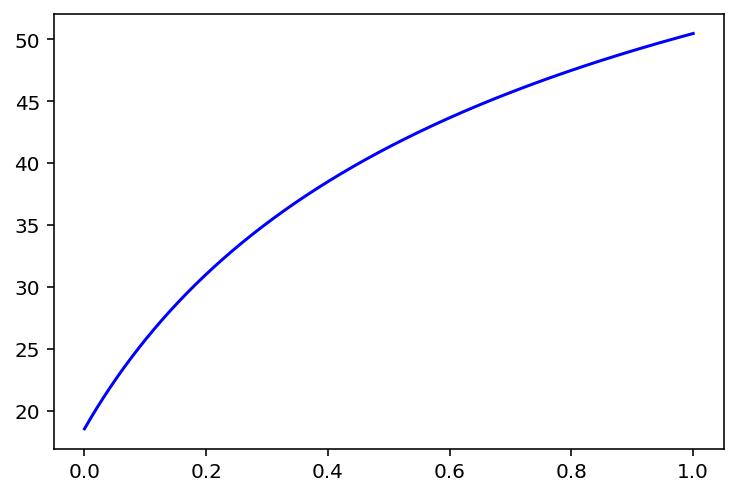

In [6]:
### PLOT POUR LE PROFIL DE CONCENTRATION DE CO2 ###

CO2 = np.linspace(0, 1, 10000)
i = 1
for i in range(len(xsi)):
    CO2[i] = 72.73 - C_A[i]
plt.plot(xsi,CO2,'b')
plt.show()

## Concentration profile plot for H2

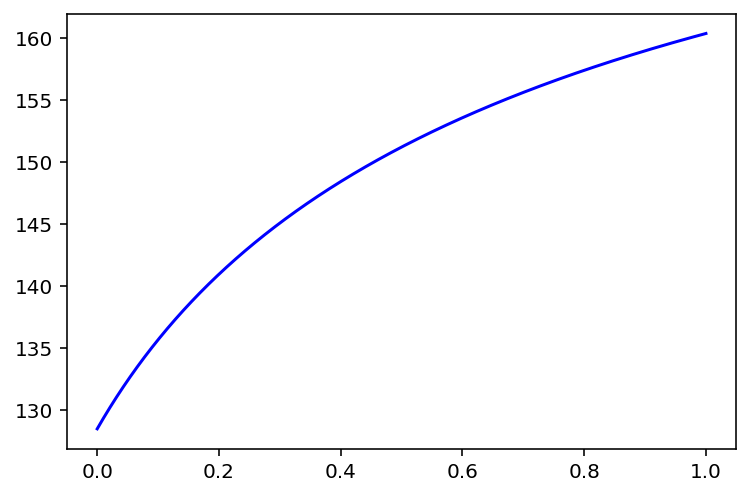

In [7]:
### PLOT POUR LE PROFIL DE CONCENTRATION DE H2 ###

H2 = np.linspace(0, 1, 10000)
i = 1
for i in range(len(xsi)):
    H2[i] = 182.6047 - C_A[i]
plt.plot(xsi,H2,'b')
plt.show()

# QUESTION 2

### Calcul des diffusivités et des nonbres de Peclet (L)


In [12]:
### Diffusivités ###
DeA = np.zeros(len(Pe_dp))
for i in range(len(Pe_dp)):
    DeA[i] = (us*dp/epsi)*(1/Pe_dp[i])
print(DeA)

### Pe ###
Pe_L = np.zeros(4)
for j in range(4):
    Pe_L[j] = (us*L/epsi)*(1/DeA[j])
print(Pe_L)


[0.00749866 0.00299946 0.00149973 0.00074987]
[ 7.5  18.75 37.5  75.  ]


### Résolution de l'équation 

Text(0.5, 1.0, '(D**2+2*D+2)y=cos(2*x)')

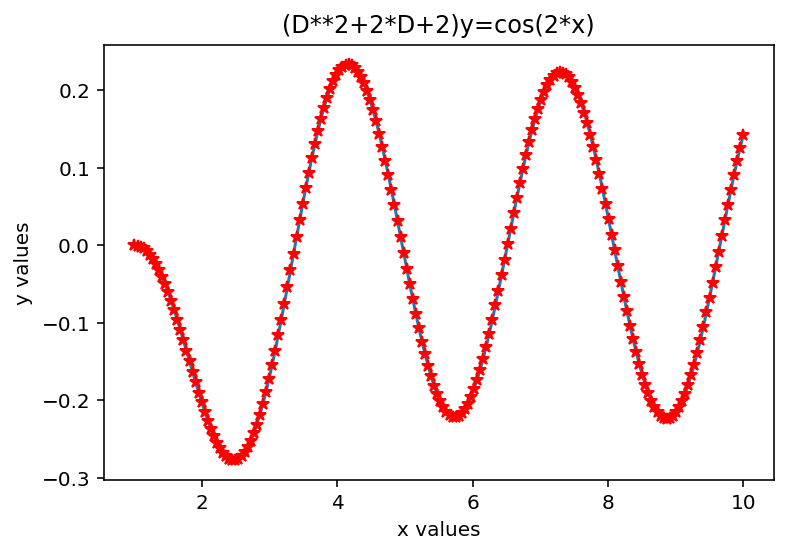

In [15]:
def f(u,x): 
    return(u[1],Pe*u[1] + (Beta/2)*((k*K_CO*K_H2O)*u[0]*(u[0]+38.6875)-((72.73-u[0])*(182.6047-u[0]))/K)/(1 + K_CO*u[0] + K_H2O*(u[0] +38.6875) + K_CO2*(72.73-u[0]) + K_H2*(182.6047-u[0]))**2)
y0 = [Ustart, 0]
xs = np.linspace(1,10,200)
us = odeint(f,y0,xs)
ys = us[:,0]
plt.plot(xs,ys,'-')
plt.plot(xs,ys,'r*')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('(D**2+2*D+2)y=cos(2*x)')